In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/20961/Desktop/Aml Final Project/UserBehavior.csv/UserBehavior.csv')
col_name = ['UserID', 'ItemID', 'CategoryID', 'BehaviorType', 'TimeStamps']
df.columns = col_name
df.head()

,UserID,ItemID,CategoryID,BehaviorType,TimeStamps
0,1,2333346,2520771,pv,1511561733
1,1,2576651,149192,pv,1511572885
2,1,3830808,4181361,pv,1511593493
3,1,4365585,2520377,pv,1511596146
4,1,4606018,2735466,pv,1511616481


In [3]:
len(df)

100150806

In [4]:
print(len(df))
print(len(df.UserID.unique()))
print(len(df.ItemID.unique()))
print(len(df.CategoryID.unique()))

100150806
987994
4162024
9439


In [5]:
#missing values
df.apply(lambda x: sum(x.isnull()))

UserID          0
ItemID          0
CategoryID      0
BehaviorType    0
TimeStamps      0
dtype: int64

In [6]:
#transform timestamps
#select 1/3 of data
from datetime import datetime
import time
start = "2017-11-25 00:00:00"
end = "2017-11-27 23:59:59"

start = int(datetime.timestamp(datetime.strptime(start, "%Y-%m-%d %H:%M:%S")))
end = int(datetime.timestamp(datetime.strptime(end, "%Y-%m-%d %H:%M:%S")))

df1 = df.loc[(df['TimeStamps'] >= start) & (df['TimeStamps'] <= end)]

In [7]:
df1.head(5)

,UserID,ItemID,CategoryID,BehaviorType,TimeStamps
0,1,2333346,2520771,pv,1511561733
1,1,2576651,149192,pv,1511572885
2,1,3830808,4181361,pv,1511593493
3,1,4365585,2520377,pv,1511596146
4,1,4606018,2735466,pv,1511616481


In [8]:
len(df1)

31185763

In [9]:
def time_transform (x):
    x['time'] = x['TimeStamps'].apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t)))
    return x

In [10]:
df1 = time_transform(df1)

<ipython-input-9-ae11de6664b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['time'] = x['TimeStamps'].apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t)))


In [12]:
df = df1
df['hour'] = df['time'].str[11:13].astype(int)
df['date'] = df['time'].str[0:10]
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.head(5)

,UserID,ItemID,CategoryID,BehaviorType,TimeStamps,time,hour,date
0,1,2333346,2520771,pv,1511561733,2017-11-25 06:15:33,6,2017-11-25
1,1,2576651,149192,pv,1511572885,2017-11-25 09:21:25,9,2017-11-25
2,1,3830808,4181361,pv,1511593493,2017-11-25 15:04:53,15,2017-11-25
3,1,4365585,2520377,pv,1511596146,2017-11-25 15:49:06,15,2017-11-25
4,1,4606018,2735466,pv,1511616481,2017-11-25 21:28:01,21,2017-11-25


In [14]:
df.reset_index(drop=True, inplace=True)

In [24]:
pv_per_day = df.loc[df['BehaviorType'] == 'pv'].groupby('date').count()['UserID']
uv_per_day = df.loc[df['BehaviorType'] == 'pv'].groupby('date')['UserID'].apply(lambda x: x.drop_duplicates().count())
pv_uv = pd.concat([pv_per_day,uv_per_day], axis=1)
pv_uv.columns=['pv','uv']
pv_uv

,pv,uv
date,,
2017-11-25,9353422,686953
2017-11-26,9567423,695869
2017-11-27,9041187,689260


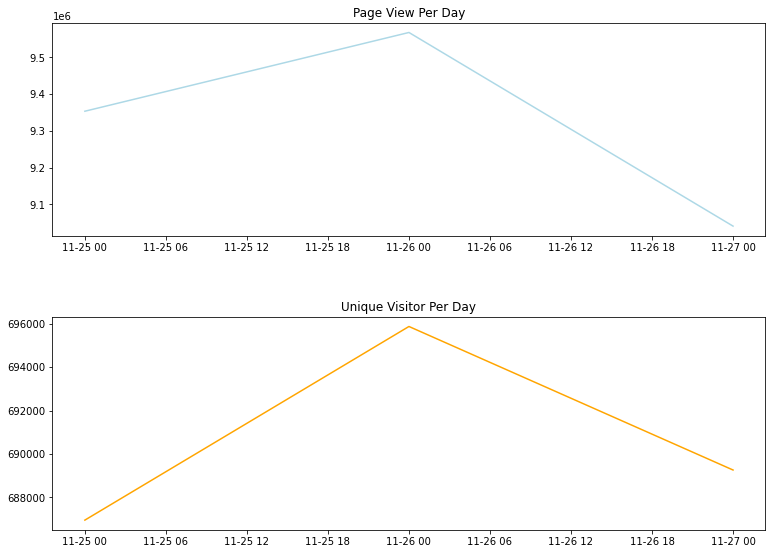

In [25]:
fig, axs = plt.subplots(2,figsize=(12,9))
fig.tight_layout(pad=6.0)
    
axs[0].plot(pv_per_day, color='lightblue')
axs[0].set_title('Page View Per Day')
axs[0].tick_params(axis='x')
axs[0].tick_params(axis='y')
    
axs[1].plot(uv_per_day, color='orange')
axs[1].set_title('Unique Visitor Per Day')
axs[1].tick_params(axis='x')
axs[1].tick_params(axis='y')

plt.savefig('PV and UV Per Day.png')

In [26]:
pv_per_hour = df.loc[df['BehaviorType'] == 'pv'].groupby('hour').count()['UserID']
uv_per_hour = df.loc[df['BehaviorType'] == 'pv'].groupby('hour')['UserID'].apply(lambda x: x.drop_duplicates().count())
pv_uv_per_hour = pd.concat([pv_per_hour,uv_per_hour],axis = 1)
pv_uv_per_hour.columns = ['pv', 'uv']

In [27]:
def plt_pv_uv(x):
    plt.figure(figsize=(10,7))
    x['pv'].plot(color='lightblue', label='page view per hour')
    plt.ylabel('Number of Page Views')
    plt.xlabel('Hour')
    plt.legend(loc = 'best')
    plt.tick_params(axis='x')
    plt.tick_params(axis='y')
    
    plt.rc('legend',fontsize=12)
    
    x['uv'].plot(color='orange', label='unique visitors per hour', secondary_y=True)
    plt.ylabel('Number of Unique Visitors')
    plt.xticks(range(0,24), x.index)
    plt.legend(loc = 'upper center')
    plt.tick_params(axis='y')
    plt.grid(True)
    plt.title('PV and UV Per Hour')
    plt.savefig('PV and UV per hour')

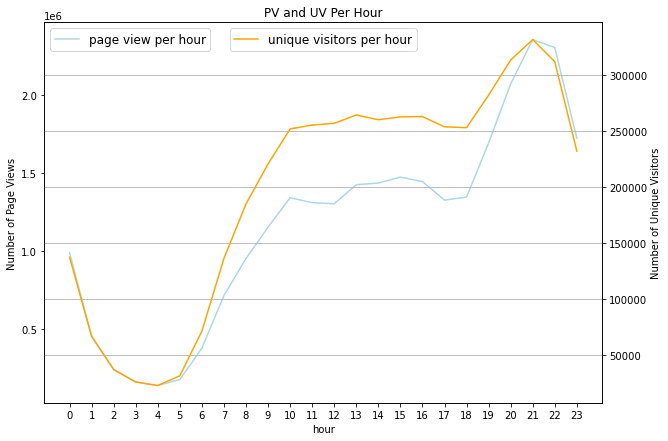

In [28]:
plt_pv_uv(pv_uv_per_hour)

In [29]:
pv_by_type = pd.pivot_table(columns='BehaviorType', index='date', data=df, values='UserID', aggfunc=np.size)

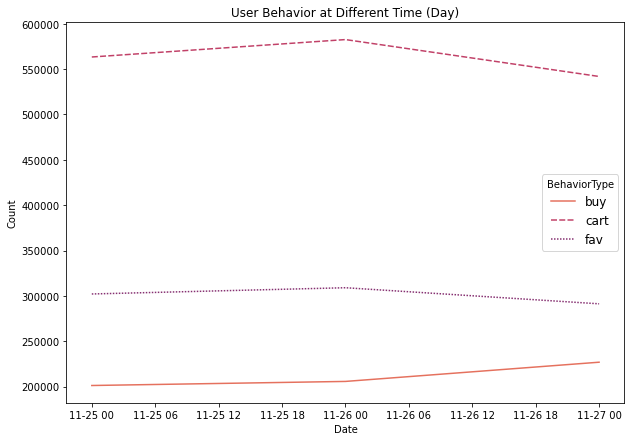

In [30]:
def plot_behavior_day(x):
    f, ax = plt.subplots(figsize=(10,7))
    p = sns.lineplot(data=x.iloc[:,:-1], palette="flare")
    ax.set_title('User Behavior at Different Time (Day)')
    ax.set_ylabel('Count')
    ax.set_xlabel('Date')
    plt.savefig('User Behavior at Different Time (Day)')
    
plot_behavior_day(pv_by_type)

In [31]:
pv_by_type_hour = pd.pivot_table(columns='BehaviorType', index='hour', data=df, values='UserID', aggfunc=np.size)

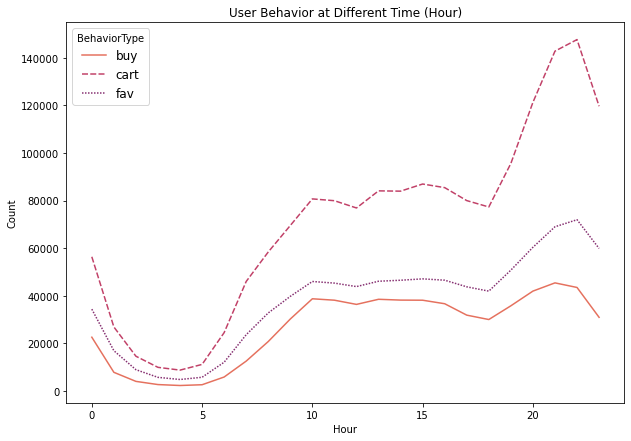

In [32]:
def plot_behavior_hour(x):
    f, ax = plt.subplots(figsize=(10,7))
    sns.lineplot(data=x.iloc[:,:-1], palette="flare")
    ax.set_title('User Behavior at Different Time (Hour)')
    ax.set_ylabel('Count')
    ax.set_xlabel('Hour')
    plt.savefig('User Behavior at Different Time (Hour)')
    
plot_behavior_hour(pv_by_type_hour)

In [33]:
buy = df[df.BehaviorType == 'buy'].groupby('UserID').size()
buy1 = df[df.BehaviorType == 'buy'].groupby(['date','UserID']).count()['BehaviorType'].reset_index().rename(columns={'BehaviorType':'total'})
df['operation'] = 1
buy2 = df.groupby(['date', 'UserID', 'BehaviorType'])['operation'].count().reset_index().rename(columns = {'operation':'total'})

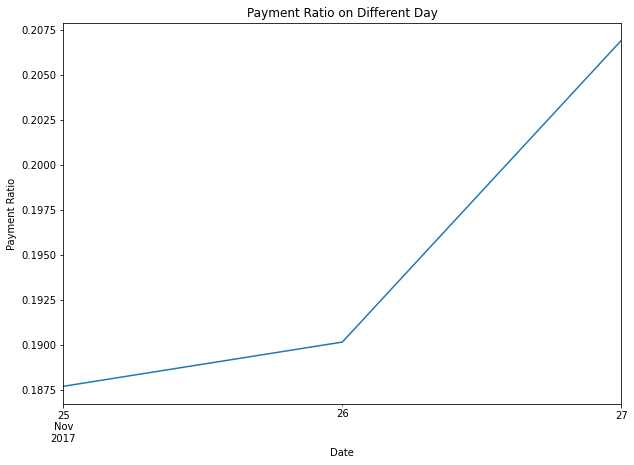

In [34]:
plt.figure(figsize=(10,7))
buy2.groupby('date').apply(lambda x: x[x['BehaviorType'] == 'buy'].total.count()/len(x.UserID.unique()) ).plot()
plt.ylabel('Payment Ratio')
plt.xlabel('Date')
plt.tick_params(axis='y')
plt.tick_params(axis='x')
plt.title('Payment Ratio on Different Day')
plt.savefig('Payment Ratio on Different Day')

In [35]:
rebuy = df[df.BehaviorType == 'buy'].groupby('UserID')['date'].apply(lambda x: len(x.unique()))
rebuy = pd.DataFrame({'UserID':rebuy.index, 'rebuy_count':rebuy.values}).sort_values('rebuy_count').reset_index(drop=True)
rebuy2 = rebuy.groupby('rebuy_count').UserID.count()

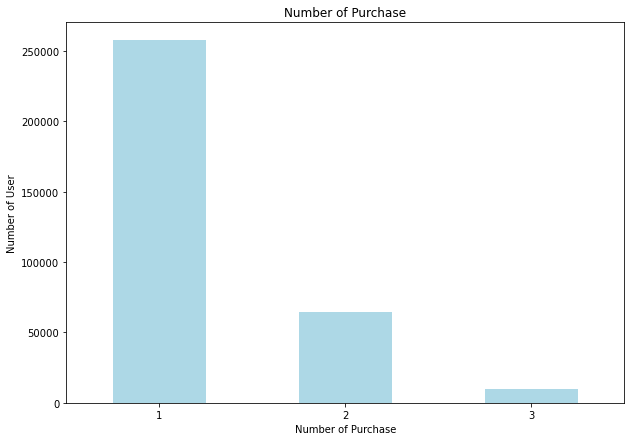

In [36]:
plt.figure(figsize=(10,7))
rebuy2.plot.bar(color = 'lightblue')
plt.xticks(rotation=0)
plt.title('Number of Purchase') 
plt.xlabel('Number of Purchase')
plt.ylabel('Number of User')
plt.tick_params(axis='y')
plt.tick_params(axis='x')
plt.savefig('Number of Purchase')

In [37]:
data_user_count = df.groupby('BehaviorType').size().sort_values(ascending=False)

<ipython-input-38-6c1cf4b7529c>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


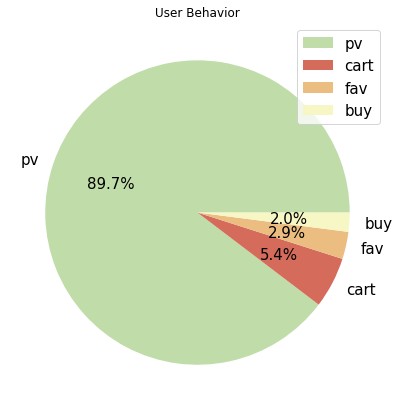

In [38]:
colors = ['#c0dca9','#d56b5b','#ecbd81','#f7f7c6']
plt.figure(figsize=(10,7))
data_user_count.plot.pie(colors = colors, autopct='%1.1f%%',textprops={'fontsize': 15})
plt.xticks(rotation=0)
plt.axes().set_ylabel('')
plt.legend(fontsize = 15)
plt.title('User Behavior')
plt.savefig('User Behavior')